# Sentiment Analysis on Tourist Accomodation Reviews

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
%matplotlib inline
import numpy as np
seed_val = 0
np.random.seed(seed_val)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#load the dataset
df=pd.read_csv('tripadvisor_hotel_reviews.csv')

In [ ]:
#look at the dataset
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
#look at the numbers of samples
len(df)

20491

In [ ]:
#look at the data types
df.dtypes

Review    object
Rating     int64
dtype: object

In [ ]:
#checking that there is no missing data
df["Review"].isna().sum()

0

In [ ]:
#checking that there is no missing data
df["Rating"].isna().sum()

0

In [ ]:
#checking the existing values of 'Rating'
print(sorted(df['Rating'].unique()))

[1, 2, 3, 4, 5]


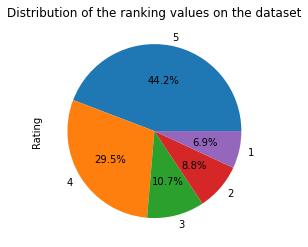

In [ ]:
#looking at the distribution of the different values in rating
df['Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the ranking values on the dataset')
plt.show()

In [ ]:
#generate the new 'sentiment' column
classification=[]
for i in range(len(df)):
    if df['Rating'][i]>=4:
        rev='Pos'
    elif df['Rating'][i]==3:
        rev='Neu'
    else:
        rev='Neg'
    classification.append(rev)
df['sentiment']=classification

In [ ]:
df.head()

,Review,Rating,sentiment
0,nice hotel expensive parking got good deal sta...,4,Pos
1,ok nothing special charge diamond member hilto...,2,Neg
2,nice rooms not 4* experience hotel monaco seat...,3,Neu
3,"unique, great stay, wonderful time hotel monac...",5,Pos
4,"great stay great stay, went seahawk game aweso...",5,Pos


We look back at the distribution of the new feature "sentiment"

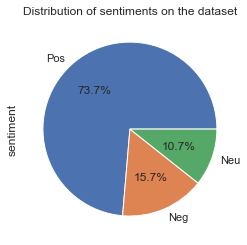

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of sentiments on the dataset')
plt.savefig('sentimentDistribution.png')
plt.show()

We look at one positive example and one negative example

In [ ]:
print(df['Review'][0])
print(df['sentiment'][0])

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  
Pos


In [ ]:
print(df['Review'][1])
print(df['sentiment'][1])

ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bus

In [ ]:
#define the funcrion for initial cleaning
def clean_rev_1(text):
    text.lower()
    #remove everything that are not letters
    text=re.sub('[^a-z]', " ", text)
    return text  

In [ ]:
#apply cleaning function to the reviews
simple_cleaned_reviews=[clean_rev_1(df['Review'][i]) for i in range(len(df))]

In [ ]:
#store in the same DataFrame
df['simple_cleaned_reviews']=simple_cleaned_reviews

In [ ]:
df.head()

,Review,Rating,sentiment,simple_cleaned_reviews
0,nice hotel expensive parking got good deal sta...,4,Pos,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Neg,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,Neu,nice rooms not experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,Pos,unique great stay wonderful time hotel monac...
4,"great stay great stay, went seahawk game aweso...",5,Pos,great stay great stay went seahawk game aweso...


In [ ]:
#shuffle the data
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [ ]:
#import the relevant libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

In [ ]:
#create a bag of words, which is vectorising the data, we will take the 1500 most commmon features
vectorised_data=TfidfVectorizer(max_features=1500, stop_words='english').fit_transform(df_shuffled['simple_cleaned_reviews']).toarray()

In [ ]:
#Create an array with the labels
labels=df_shuffled['sentiment'].values

In [ ]:
#Define the sentiment labels in 'sentiment order' 
unique_labels=['Pos', 'Neu','Neg']

In [ ]:
#split the data into train x and y sets and test x and y sets
x_train=vectorised_data[:int(len(df)*0.75)]
y_train=labels[:int(len(df)*0.75)]
x_test=vectorised_data[int(len(df)*0.75):]
y_test=labels[int(len(df)*0.75):]

In [ ]:
#Define the classifier, train the classifier and get the predicted values for the x test set
clf=GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred, labels=unique_labels)
print(matrix)

[[2849  691  272]
 [ 130  241  164]
 [  43  151  582]]


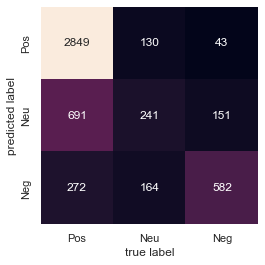

In [ ]:
#visualise the confusion matrix
import seaborn as sns
sns.set()
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
#import the specific metrics to meausure
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
f1_macroNB=f1_score(y_test, y_pred, average='macro')
f1_macroNB

0.5935001288769658

In [ ]:
f1NB=f1_score(y_test, y_pred, average=None)
f1NB

array([0.64882943, 0.29789864, 0.83377231])

In [ ]:
accuracyNB=accuracy_score(y_test, y_pred)
accuracyNB

0.7167675190318173

In [ ]:
#download and import relevant libraries
import gensim
nltk.download('word2vec_sample')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# load a pre-build model
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
news_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#create a function to add embeddings to the reviews
def append_similar_adjectives_to_review(review):
    #tag the text
    text=nltk.word_tokenize(review)
    tags=nltk.pos_tag(text)
    #extract adjectives
    adjectives=[]
    for word, tag in tags:
        if tag=='JJ':
            adjectives.append(word)
    #try to find embedding words for the adjectives        
    similars=[]
    for adjective in adjectives:
        try:
            similar, value=news_model.most_similar(positive=[adjective], topn = 1)[0]
            similars.append(similar)
        except KeyError:
            pass
    #add embeddings to the review
    for word in similars:
        review=review+" "+word
    return review

In [ ]:
#add the embeddings to each of the reviews
reviewes_plus_embedings=[]
for i in range(len(df_shuffled)):
    reviewes_plus_embedings.append(append_similar_adjectives_to_review(df_shuffled['simple_cleaned_reviews'][i]))

In [ ]:
df_shuffled['reviews_with_embeddings']=reviewes_plus_embedings

In [ ]:
#visualise the change
print('Simple cleaned review:')
print(df_shuffled['simple_cleaned_reviews'][15])
print('-----')
print('Review with embeddings on adjectives:')
print(df_shuffled['reviews_with_embeddings'][15])

Simple cleaned review:
clean classy hotel low key exotic elegance absolutely fell love beautiful tastefully appointed hotel heart waikiki  especially fell awesome two story waterfall open air lobby  selling point hotel stay waikiki  room quiet large appointed rattan type furnishings  staff bent backwards helpful good advice restaurants inter island travel attentive needs  hotel unique open air roof elegant designer jewelry shops nice boutiques span blocks  long hallways decorated beautiful asian antiques vases statuettes  place enormous does n t big obtrusive hotel feel like  good restaurants hotel complex serve good food easy access  loved parrots cages placed corridors  got terrific magnificent breakfast plan included free unlimited buffet style japanese continental breakfasts daily hotel price  loved leaving hotel coming elegant charms convenient beach location  tremendous experience no doubt love repeat soon   
-----
Review with embeddings on adjectives:
clean classy hotel low key 

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import wordnet
nltk.download('wordnet')
wnl=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def lemmatise_review(review):
    word_list = nltk.word_tokenize(review)
    lemmatized_review = ' '.join([wnl.lemmatize(w, pos='v') for w in word_list])
    return lemmatized_review

In [ ]:
lemmatized_reviewes=[lemmatise_review(df_shuffled['reviews_with_embeddings'][i]) for i in range(len(df_shuffled))]
df_shuffled['lemmatized_reviews']=lemmatized_reviewes

In [ ]:
print('Review with embeddings on adjectives:')
print(df_shuffled['reviews_with_embeddings'][15])
print('-----')
print('lemmatised review:')
print(df_shuffled['lemmatized_reviews'][15])

Review with embeddings on adjectives:
clean classy hotel low key exotic elegance absolutely fell love beautiful tastefully appointed hotel heart waikiki  especially fell awesome two story waterfall open air lobby  selling point hotel stay waikiki  room quiet large appointed rattan type furnishings  staff bent backwards helpful good advice restaurants inter island travel attentive needs  hotel unique open air roof elegant designer jewelry shops nice boutiques span blocks  long hallways decorated beautiful asian antiques vases statuettes  place enormous does n t big obtrusive hotel feel like  good restaurants hotel complex serve good food easy access  loved parrots cages placed corridors  got terrific magnificent breakfast plan included free unlimited buffet style japanese continental breakfasts daily hotel price  loved leaving hotel coming elegant charms convenient beach location  tremendous experience no doubt love repeat soon    Clean high crucial oriental gorgeous amazing opened calm

In [ ]:
df_shuffled.head()

,Review,Rating,sentiment,simple_cleaned_reviews,reviews_with_embeddings,lemmatized_reviews
0,ehhh better punta cana twice compared hotel st...,2,Neg,ehhh better punta cana twice compared hotel st...,ehhh better punta cana twice compared hotel st...,ehhh better punta cana twice compare hotel sta...
1,"4 n't think, decided book atenea night stay de...",2,Neg,n t think decided book atenea night stay de...,n t think decided book atenea night stay de...,n t think decide book atenea night stay decemb...
2,awesome time just returned vacation fantastic ...,4,Pos,awesome time just returned vacation fantastic ...,awesome time just returned vacation fantastic ...,awesome time just return vacation fantastic ti...
3,"grand oasis wonderful second time, group 20 fr...",5,Pos,grand oasis wonderful second time group fr...,grand oasis wonderful second time group fr...,grand oasis wonderful second time group friend...
4,not bad stay stayed hotel family attending jav...,3,Neu,not bad stay stayed hotel family attending jav...,not bad stay stayed hotel family attending jav...,not bad stay stay hotel family attend javaone ...


In [ ]:
vectorised_cured_data=TfidfVectorizer(max_features=1500, stop_words='english').fit_transform(df_shuffled['lemmatized_reviews']).toarray()

In [ ]:
x_train=vectorised_cured_data[:int(len(df)*0.75)]
y_train=labels[:int(len(df)*0.75)]
x_test=vectorised_cured_data[int(len(df)*0.75):]
y_test=labels[int(len(df)*0.75):]

In [ ]:
#train the model
clfGNB=GaussianNB()
clfGNB.fit(x_train,y_train)

GaussianNB()

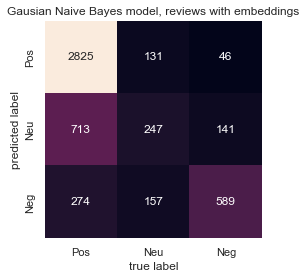

In [ ]:
#get the predictions and generate the matrix
y_pred=clfGNB.predict(x_test)
matrix1=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Gausian Naive Bayes model, reviews with embeddings')
plt.show()

In [ ]:
#calculate the evaluation metrics
f1_macroGNBEmbeddings=f1_score(y_test, y_pred, average='macro')
f1_macroGNBEmbeddings

0.5956777407157473

In [ ]:
accuracyGNBEmbeddings=accuracy_score(y_test, y_pred)
accuracyGNBEmbeddings

0.7146203396447394

In [ ]:
f1_GNBEmbeddings=f1_score(y_test, y_pred, average=None)
f1_GNBEmbeddings

array([0.655902  , 0.30195599, 0.82917523])

#### 2. Multinomial Naive Bayes

In [ ]:
#train the model
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

In [ ]:
#get the predictions
y_pred=clf.predict(x_test)

In [ ]:
 #generate the matrix
matrix2=confusion_matrix(y_test,y_pred, labels=unique_labels)


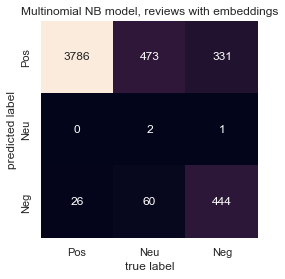

In [ ]:
#visualise the matrix
sns.heatmap(matrix2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Multinomial NB model, reviews with embeddings')
plt.show()

In [ ]:
#calculate the evaluation metrics
f1_macroMNNBEmbeddings=f1_score(y_test, y_pred, average='macro')
f1_macroMNNBEmbeddings

0.5295292283875508

In [ ]:
f1_MNNBEmbeddings=f1_score(y_test, y_pred, average=None)
f1_MNNBEmbeddings

array([0.67993874, 0.00743494, 0.901214  ])

In [ ]:
accuracyMNNBEmbeddings=accuracy_score(y_test, y_pred)
accuracyMNNBEmbeddings

0.8260784696466914

#### 3. Decision Tree

In [ ]:
#import and create the classifier
from sklearn.tree import DecisionTreeClassifier
DTclf=DecisionTreeClassifier()

In [ ]:
#train the classifier
DTclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict the values
y_pred=DTclf.predict(x_test)

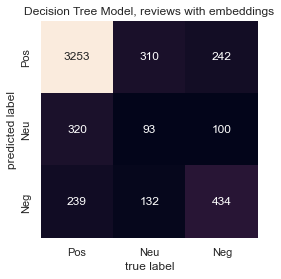

In [ ]:
matrix3=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree Model, reviews with embeddings')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroDTEmbeddings=f1_score(y_test, y_pred, average='macro')
f1_macroDTEmbeddings

0.5268808581832636

In [ ]:
f1_DTEmbeddings=f1_score(y_test, y_pred, average=None)
f1_DTEmbeddings

array([0.54901961, 0.17748092, 0.85414205])

In [ ]:
accuracyDTEmbeddings=accuracy_score(y_test, y_pred)
accuracyDTEmbeddings

0.7378489166504002

#### 4. Suport Vector Machine

In [ ]:
#import and create a classifier
from sklearn import svm
clfsvc = svm.SVC(decision_function_shape='ovo')

In [ ]:
#train the classifier
clfsvc.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
#get predictions
y_pred=clfsvc.predict(x_test)

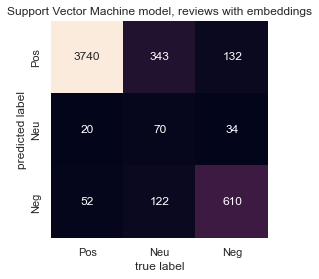

In [ ]:
#create and visualise the confusion matrix
matrix4=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix4.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Support Vector Machine model, reviews with embeddings')
plt.savefig('svmConfMatrix.png')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroSVMEmbeddings=f1_score(y_test, y_pred, average='macro')
f1_macroSVMEmbeddings

0.6421164556871379

In [ ]:
f1_SVMEmbeddings=f1_score(y_test, y_pred, average=None)
f1_SVMEmbeddings

array([0.78205128, 0.2124431 , 0.93185499])

In [ ]:
accuracySVMEmbeddings=accuracy_score(y_test, y_pred)
accuracySVMEmbeddings

0.8627757173531134

#### 5. Weighted Support Vector Machine

In [ ]:
#create the classifier with class weight
clfsvcW = svm.SVC(decision_function_shape='ovo', class_weight={'Pos':7, 'Neu':1, 'Neg':1.5 })

In [ ]:
#train and predict
clfsvcW.fit(x_train,y_train)
y_pred=clfsvcW.predict(x_test)

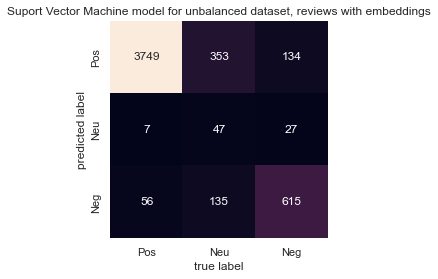

In [ ]:
#create and visualise matrix
matrix5=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix5.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model for unbalanced dataset, reviews with embeddings')
plt.show()

In [ ]:
#get the evaluation metrics
f1_macroSVMWembeddings=f1_score(y_test, y_pred, average='macro')
f1_macroSVMWembeddings

0.6205847606008588

In [ ]:
f1_SVMWembeddings=f1_score(y_test, y_pred, average=None)
f1_SVMWembeddings

array([0.77749684, 0.1525974 , 0.93166004])

In [ ]:
accuracySVMWembeddings=accuracy_score(y_test, y_pred)
accuracySVMWembeddings

0.8610189342182315

In [ ]:
#get the stop words
stops=set(stopwords.words('english'))

In [ ]:
#define a function to lemmatise the reviews
def lemmatise_clean_review(review):
    word_list = nltk.word_tokenize(review)
    lemmatized_review = ' '.join([wnl.lemmatize(w) for w in word_list if w not in stops])
    return lemmatized_review

In [ ]:
#lemmatise the reviews
cleaned_reviews= [lemmatise_clean_review(review) for review in simple_cleaned_reviews]

In [ ]:
#join all the corpus in a single string
all_reviews=' '.join(cleaned_reviews)

In [ ]:
#Create a frequency distribution of the words in the corpus
all_words = nltk.FreqDist(w for w in all_reviews.split())

In [ ]:
all_words

FreqDist({'hotel': 54050, 'room': 47779, 'great': 21485, 'n': 19112, 'good': 17491, 'staff': 16706, 'stay': 15601, 'night': 14577, 'day': 13484, 'time': 12981, ...})

In [ ]:
#generate a list of the 500 most common words
N=500
word_features = list(all_words)[:N]

In [ ]:
#show the 30 most common features
word_features[:30]

['hotel',
 'room',
 'great',
 'n',
 'good',
 'staff',
 'stay',
 'night',
 'day',
 'time',
 'nice',
 'location',
 'service',
 'beach',
 'stayed',
 'restaurant',
 'breakfast',
 'food',
 'clean',
 'place',
 'resort',
 'pool',
 'like',
 'really',
 'bed',
 'area',
 'bar',
 'friendly',
 'people',
 'small']

In [ ]:
# build a function to extract the features from each review
def review_features(review): 
    words = nltk.word_tokenize(review) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in words)
    return features

In [ ]:
#extract the features from each review and store this in a list
feature_reviews =[review_features(df_shuffled['simple_cleaned_reviews'][i]) for i in range(len(df))]

In [ ]:
#generate a list of sets
features_labels_set=[(feature_reviews[i],df_shuffled['sentiment'][i]) for i in range(len(df))]

In [ ]:
#splitting the data into training and test sets
train_data=features_labels_set[:int(len(df)*0.75)]
test_data=features_labels_set[int(len(df)*0.75):]

In [ ]:
#generating only the x test set so we will be able to predict the values and evaluate the models on the same way as the previous models
x_test=feature_reviews[int(len(df)*0.75):]

In [ ]:
#Generate the model and train it
NBclassifier = nltk.NaiveBayesClassifier.train(train_data)

In [ ]:
#generate the prediction for the test data
y_pred=[NBclassifier.classify(review) for review in x_test]

In [ ]:
#transfer it as an array
y_pred_array=np.array(y_pred)

In [ ]:
#get the real test labels so we will be able to compare
y_test=df_shuffled['sentiment'][int(len(df)*0.75):].values

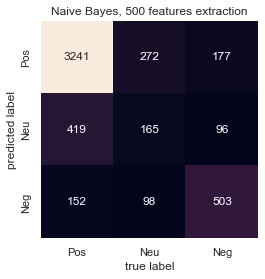

In [ ]:
#generate the confusion matrix to evaluate
matrix6=confusion_matrix(y_test,y_pred_array, labels=unique_labels)
sns.heatmap(matrix6.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Naive Bayes, 500 features extraction')
plt.show()

In [ ]:
accuracyNBFeatureExtraction=nltk.classify.accuracy(NBclassifier, test_data)
accuracyNBFeatureExtraction

0.7630294749170408

In [ ]:
f1_macroNBFeatureExtraction=f1_score(y_test,y_pred_array, average='macro')
f1_macroNBFeatureExtraction

0.5978625218154416

In [ ]:
f1_NBFeatureExtraction=f1_score(y_test,y_pred_array, average=None)
f1_NBFeatureExtraction

array([0.65794637, 0.27160494, 0.86403626])

#### The Naive Bayes classifier is capable of presenting the most informative features

In [ ]:
NBclassifier.show_most_informative_features(50)

Most Informative Features
         contains(dirty) = True              Neg : Pos    =     14.5 : 1.0
         contains(worst) = True              Neg : Pos    =     13.5 : 1.0
          contains(rude) = True              Neg : Pos    =      9.6 : 1.0
       contains(perfect) = True              Pos : Neg    =      6.5 : 1.0
         contains(loved) = True              Pos : Neg    =      6.2 : 1.0
       contains(finally) = True              Neg : Pos    =      5.9 : 1.0
        contains(superb) = True              Pos : Neg    =      5.8 : 1.0
          contains(poor) = True              Neg : Pos    =      5.7 : 1.0
          contains(told) = True              Neg : Pos    =      5.5 : 1.0
      contains(spacious) = True              Pos : Neg    =      4.8 : 1.0
     contains(fantastic) = True              Pos : Neg    =      4.8 : 1.0
        contains(highly) = True              Pos : Neu    =      4.5 : 1.0
        contains(modern) = True              Pos : Neg    =      4.4 : 1.0

#### 2. Decision Tree

In [ ]:
#Create the Decision Tree classifier, train the data and predict the values for the x_test dataset
DTclassifier = nltk.DecisionTreeClassifier.train(train_data)
y_pred=[DTclassifier.classify(review) for review in x_test]

In [ ]:
y_pred_array=np.array(y_pred)

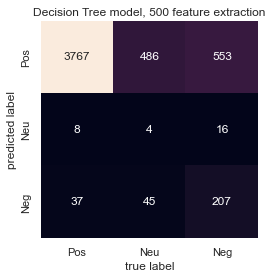

In [ ]:
#visualise the results
matrix7=confusion_matrix(y_test,y_pred_array, labels=unique_labels)
sns.heatmap(matrix7.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree model, 500 feature extraction')
plt.show()

In [ ]:
accuracyDTFeatureExtraction=nltk.classify.accuracy(DTclassifier, test_data)
accuracyDTFeatureExtraction

0.7764981456178021

In [ ]:
f1_macroDTFeatureExtraction=f1_score(y_test,y_pred_array, average='macro')
f1_macroDTFeatureExtraction

0.4257195804893994

In [ ]:
f1_DTFeatureExtraction=f1_score(y_test,y_pred_array, average=None)
f1_DTFeatureExtraction

array([0.38873239, 0.01420959, 0.87421676])

In [ ]:
feature_reviews_list_of_list=[list(review.values()) for review in feature_reviews ]

In [ ]:
feature_reviews_array=np.array(feature_reviews_list_of_list)

In [ ]:
x_train=feature_reviews_array[:int(len(df)*0.75)]
x_test=feature_reviews_array[int(len(df)*0.75):]
y_train=labels[:int(len(df)*0.75)]
y_test=labels[int(len(df)*0.75):]

In [ ]:
clfsvc_500_features = svm.SVC(decision_function_shape='ovo')
clfsvc_500_features.fit(x_train,y_train)

SVC(decision_function_shape='ovo')

In [ ]:
y_pred=clfsvc_500_features.predict(x_test)

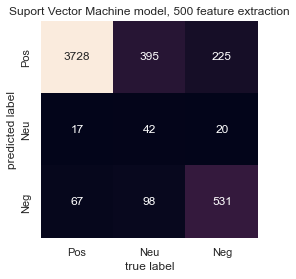

In [ ]:
matrix8=confusion_matrix(y_test,y_pred, labels=unique_labels)
sns.heatmap(matrix8.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Suport Vector Machine model, 500 feature extraction')
plt.show()

In [ ]:
accuracySVMFeatureExtraction=accuracy_score(y_test, y_pred)
accuracySVMFeatureExtraction

0.8395471403474527

In [ ]:
f1_macroSVMFeatureExtraction=f1_score(y_test, y_pred, average='macro')
f1_macroSVMFeatureExtraction

0.5906668996966675

In [ ]:
f1_SVMFeatureExtraction=f1_score(y_test, y_pred, average=None)
f1_SVMFeatureExtraction

array([0.72146739, 0.13680782, 0.91372549])

In [ ]:
import textblob
from textblob import TextBlob

In [ ]:
#define a function to predict the sentiment using the polarity value from the TextBlob model. 
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_sentiment(review):
    result=TextBlob(review).sentiment
    if result.polarity >0.1:
        sentiment='Pos'
    elif result.polarity<-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [ ]:
#predict the sentiment for each of the reviews
text_blob_sentiments=[predict_sentiment(df_shuffled['Review'][i]) for i in range(len(df)) ]

In [ ]:
#get the real sentiment
real_sentiments=list(df_shuffled['sentiment'])

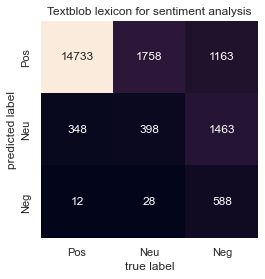

In [ ]:
#visualise the results
matrix9=confusion_matrix(real_sentiments,text_blob_sentiments, labels=unique_labels)
sns.heatmap(matrix9.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Textblob lexicon for sentiment analysis')
plt.show()

In [ ]:
#get the evaluation metrics
accuracyTextBlobLexicon=accuracy_score(real_sentiments, text_blob_sentiments)
accuracyTextBlobLexicon

0.7671172709970231

In [ ]:
f1_macroTextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average='macro')
f1_macroTextBlobLexicon

0.4623651844081122

In [ ]:
f1_TextBlobLexicon=f1_score(real_sentiments, text_blob_sentiments, average=None)
f1_TextBlobLexicon

array([0.30609058, 0.18119736, 0.89980762])

#### 2. NLTK 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kraca\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#define a function to predict the sentiment using the polarity value from the NLTK model built with Vader lexicon. 
#The reviews which polarity value are close to 0 will be classified as neutral
#The reviews with positive polarity higher than 0.1 will be classified as Positives
#And the reviews with negative polarity, lower than 0.1 will be classified as Negatives
def predict_vader_sentiment(review):
    result=sia.polarity_scores(review)['compound']
    if result >0.1:
        sentiment='Pos'
    elif result <-0.1:
        sentiment='Neg'
    else:
        sentiment='Neu'
    return sentiment

In [ ]:
vader_sentiments=[predict_vader_sentiment(df_shuffled['Review'][i]) for i in range(len(df))]

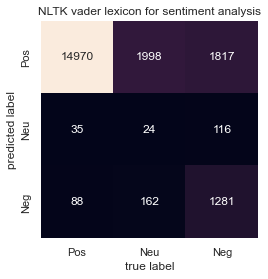

In [ ]:
matrix10=confusion_matrix(real_sentiments,vader_sentiments, labels=unique_labels)
sns.heatmap(matrix10.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('NLTK vader lexicon for sentiment analysis')
plt.show()

In [ ]:
accuracyNLTKVaderLexicon=accuracy_score(real_sentiments, vader_sentiments)
accuracyNLTKVaderLexicon

0.794251134644478

In [ ]:
f1_macroNLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average='macro')
f1_macroNLTKVaderLexicon

0.48134791744476607

In [ ]:
f1_NLTKVaderLexicon=f1_score(real_sentiments, vader_sentiments, average=None)
f1_NLTKVaderLexicon

array([0.53993678, 0.0203476 , 0.88375937])

In [ ]:
#join all the f1 arrays into a single array
f1_summary=np.concatenate((f1NB,f1_GNBEmbeddings,f1_MNNBEmbeddings,f1_DTEmbeddings,f1_SVMEmbeddings,
                                  f1_SVMWembeddings,f1_NBFeatureExtraction,f1_DTFeatureExtraction,
                                  f1_SVMFeatureExtraction, f1_TextBlobLexicon, f1_NLTKVaderLexicon), axis=0)
#reshape it to the correct shape
f1_summary=f1_summary.reshape((11,3))
#create a dataframe
f1_df=pd.DataFrame(f1_summary, columns=["f1_'Neg'", "f1_'Neu","f1_'Pos"])

In [ ]:
#create a dataframe to summarise the preprocessing techniques, the models and the evaluation metrics
summary=pd.DataFrame({'Pre-processing':['bag of words','embedding, lemmatisation and BoW','embedding, lemmatisation and BoW',
                                       'embedding, lemmatisation and BoW','embedding, lemmatisation and BoW',
                                       'embedding, lemmatisation and BoW','lemmatisation and feature extraction',
                                       'lemmatisation and feature extraction','lemmatisation and feature extraction'," "," "],
                      'Model':['Gaussian Naive Bayes','Gaussian Naive Bayes','Multinomial Naive Bayes', 'Decision Tree',
                               'Support Vector Machine', 'SVM with weights','Naive Bayes','Decision Tree',
                               'Support Vector Machine','TextBlob Lexicon', 'NLTK Vader Lexicon'],
                      'Accuracy':[accuracyNB,accuracyGNBEmbeddings,accuracyMNNBEmbeddings,accuracyDTEmbeddings,accuracySVMEmbeddings,
                                  accuracySVMWembeddings,accuracyNBFeatureExtraction, accuracyDTFeatureExtraction,
                                   accuracySVMFeatureExtraction, accuracyTextBlobLexicon,
                                  accuracyNLTKVaderLexicon],
                     'f1_macroaveraging':[f1_macroNB,f1_macroGNBEmbeddings,f1_macroMNNBEmbeddings,f1_macroDTEmbeddings,f1_macroSVMEmbeddings,
                                  f1_macroSVMWembeddings,f1_macroNBFeatureExtraction,f1_macroDTFeatureExtraction,
                                  f1_macroSVMFeatureExtraction, f1_macroTextBlobLexicon, f1_macroNLTKVaderLexicon]})
summary=pd.concat((summary,f1_df), axis=1)
summary

,Pre-processing,Model,Accuracy,f1_macroaveraging,f1_'Neg',f1_'Neu,f1_'Pos
0,bag of words,Gaussian Naive Bayes,0.716768,0.593500,0.648829,0.297899,0.833772
1,"embedding, lemmatisation and BoW",Gaussian Naive Bayes,0.714620,0.595678,0.655902,0.301956,0.829175
2,"embedding, lemmatisation and BoW",Multinomial Naive Bayes,0.826078,0.529529,0.679939,0.007435,0.901214
3,"embedding, lemmatisation and BoW",Decision Tree,0.737849,0.526881,0.549020,0.177481,0.854142
4,"embedding, lemmatisation and BoW",Support Vector Machine,0.862776,0.642116,0.782051,0.212443,0.931855
5,"embedding, lemmatisation and BoW",SVM with weights,0.861019,0.620585,0.777497,0.152597,0.931660
6,lemmatisation and feature extraction,Naive Bayes,0.763029,0.597863,0.657946,0.271605,0.864036
7,lemmatisation and feature extraction,Decision Tree,0.776498,0.425720,0.388732,0.014210,0.874217
8,lemmatisation and feature extraction,Support Vector Machine,0.839547,0.590667,0.721467,0.136808,0.913725
9,,TextBlob Lexicon,0.767117,0.462365,0.306091,0.181197,0.899808
